# Part 2: Implementing the Perceptron Algorithm
Similarly to what was done in Part 1, in this part of the lab, you will be implementing the percetron's learning algorithm.

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
def get_x1_boundary(W,b,x2):
    '''Auxiliaty function to get points from the decision boundary.
    Recall the boundary is at w^Tx + b = 0'''
    x1= -(W[1]*x2+b)/W[0]
    return x1

def plot_decision_boundary(w, b, X, y, title):
    '''
    Auxiliary function for plotting
    '''
    x_min = -0.5
    x_max = 3

    h = 1
    xx = np.arange(x_min, x_max, h)

    line_1_x1 = get_x1_boundary(w, b, xx)
    plt.figure(figsize=(3, 3))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.plot(line_1_x1.T,xx, c="blue")

    plt.title(title)
    plt.xlim([-0.2,1.2])
    plt.ylim([-0.2,1.2])
    plt.show()
    
def plot_decision_boundaries(w1, w2, w3, b1, b2, b3, X, y, title):
    '''
    Auxiliary function for plotting
    '''
    x_min = -0.5
    x_max = 3

    h = 1
    xx = np.arange(x_min, x_max, h)

    line_1_x1 = get_x1_boundary(w1, b1, xx)
    line_2_x1 = get_x1_boundary(w2, b2, xx)
    line_3_x1 = get_x1_boundary(w3, b3, xx)
    plt.figure(figsize=(3, 3))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.plot(line_1_x1.T,xx, c="blue")
    plt.plot(line_2_x1.T,xx, c="red")
    plt.plot(line_3_x1.T,xx, c="green")

    plt.title(title)
    plt.xlim([-0.2,1.2])
    plt.ylim([-0.2,1.2])
    plt.show()

The perceptron algorithm, as seen in the course, is as follows: 

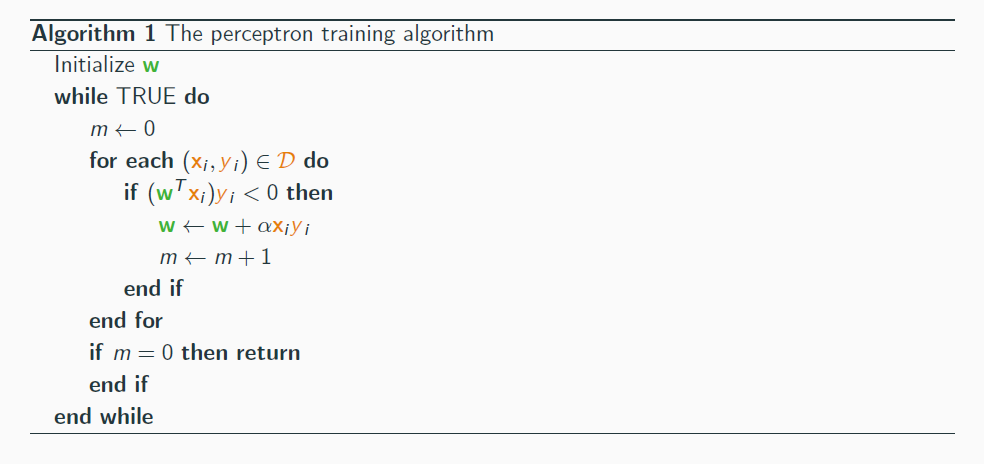

## Exercise 1: Implementing the Perceptron Class 
We will now implement a Perceptron class that contains all the necessary methods to run the perceptron algorithm. The class contains two attributes `w` and `b`, which correspond to the perceptron's parameters. Please note that in this implementation the bias $b$ is separated and not represented in a matrix form.


### Question 1.1 Code inspection
Have a look at the class skeleton provided below and try to understand the code. 
- (True/False) It is possible to initialize the perceptron's parameters with user-provided values. Justify your answer.

True, because it is written in initialize_weights; "Both w and b can be provided by the user".

### Task 1.1 Implement the perceptron's update step
Complete the method `gradient_descent_step` to update the perceptron's parameters (i.e. $\mathbf{w} \leftarrow \mathbf{w} +\ldots$ and $b \leftarrow b \ldots$ ) at any given gradient descent step 

### Task 1.2 Implement the perceptron's algorithm
Complete the method `perceptron_algorithm` using Algorithm 1 as a guideline. Make sure you make use of `gradient_descent_step` that you just implemented

### Task 1.3 Implement the percepton's prediction
Implement the `predict` method, which returns labels for a given set of inputs. 

In [11]:
class Perceptron:
    
    def __init__(self):
        '''
        Constructor of the class. Defines the class' two parameters w and b as None
        '''
        self.w = None
        self.b = None
        
    def initialize_weights(self, X, w = None,b = None):
        '''
        Initializes the weights (w) and bias term (b) of the perceptron, making sure that w matches the feature dimension space.
        Both w and b can be provided by the user.
        
        Inputs:
        X - Input dataset
        w - (optional) vector of weights. If not provided, w will be initialized with a random vector
        b - (optional) bias 
        '''
        
        if w is None:
            w = np.random.rand(X.shape[1],1)
        
        if b is None:
            b =  np.random.rand(1,1)   
            
        self.w = w
        self.b = b
        
    def gradient_descent_step(self, x, y, w, b, alpha):
        '''
        Performs a gradient descent step for the perceptron updating w and b
        
        Input:
        x - input sample
        y - label associated to x
        w - Parameters vector of size D x 1
        b - Bias term (scalar)
        alpha - Learning rate 
        '''
        
        #OUR CODE
        x=np.vstack(x)
        w = w+alpha*y*x
        b = b+alpha*y
        
        self.w = w
        self.b = b
        
        return
    
    def perceptron_algorithm(self, X, y, w = None, b = None, alpha = 0.01):
        '''
        Implements the perceptron algorithm as seen in the course. 
        Input:
        X - Matrix with input features
        y - vector of labels
        w - Parameters vector of size D x 1 (optional)
        b - Bias term (optional)
        alpha - Learning rate (default value 0.01)
        
        Returns
        Number of iterations performed
        '''
        
        self.initialize_weights(X, w, b)
        print(f'Initial weights: ({self.w} , {self.b})')

        iteration = 0
    
        while True:
            #print("*************** Iteration No: ", iteration, "************************")
            #OUR CODE:
            m = 0
            
            for i in range(len(X)):
                wx = (self.w.T)@X[i]
                wxy = (wx+self.b)*y[i]
                
                if wxy[0][0] <= 0:
                    self.gradient_descent_step(X[i], y[i], self.w, self.b, alpha)
                    m += 1
            
            if m==0:
                break
            iteration += 1

        return iteration
    
    def predict(self, X):
        '''
        Predicts labels y given an input matrix X
        Input: 
        X- matrix of dimensions N x D

        Output:
        y_pred - vector of labels (dimensions N x 1)
        '''
        
        #OUR CODE:
        Xweights = self.initialize_weights(X)
        y_pred = Xweights > 0
        return y_pred.astype(int)
        

## Exercise 2: Testing your implementation
We will use a very simple scenario to check that the Perceptron's implementation is working. We will use the Perceptron to solve the logical functions AND and OR. These are summarized below:

| A    | B    |  A AND B  |  A OR B | 
|------|------|-----      |-----    |
|  0   |  0   | 0         | 0       |
|  0   |  1   | 0         | 1       | 
|  1   |  0   | 0         | 1       | 
|  1   |  1   | 1         | 1       | 

Let us first code the inputs A,B of the table properly:

In [6]:
X = np.ndarray(shape=(4,2), dtype=int)
X[0,0] = 0
X[0,1] = 0
X[1,0] = 0
X[1,1] = 1
X[2,0] = 1
X[2,1] = 0
X[3,0] = 1
X[3,1] = 1

y_OR = np.array([-1, 1, 1, 1])
y_AND = np.array([-1, -1, -1, 1])
 

### Task 2.1 OR function
Create an instance of the Perceptron class and store it in a variable called `perceptron_OR`. Call the perceptron_algorithm method and store its output in a variable `iterations_OR`

In [7]:
#OUR CODE:
perceptron_OR = Perceptron()
iterations_OR = perceptron_OR.perceptron_algorithm(X,y_OR)

Initial weights: ([[0.04087868]
 [0.39812753]] , [[0.70608164]])
*************** Iteration No:  0 ************************
*************** Iteration No:  1 ************************
*************** Iteration No:  2 ************************
*************** Iteration No:  3 ************************
*************** Iteration No:  4 ************************
*************** Iteration No:  5 ************************
*************** Iteration No:  6 ************************
*************** Iteration No:  7 ************************
*************** Iteration No:  8 ************************
*************** Iteration No:  9 ************************
*************** Iteration No:  10 ************************
*************** Iteration No:  11 ************************
*************** Iteration No:  12 ************************
*************** Iteration No:  13 ************************
*************** Iteration No:  14 ************************
*************** Iteration No:  15 ************************
*

If your implementation is correct, it should have converged after a certain number of iterations. Moreover, the decision boundary plotted below should separate properly the two classes.

The perceptron converged in 71 iterations


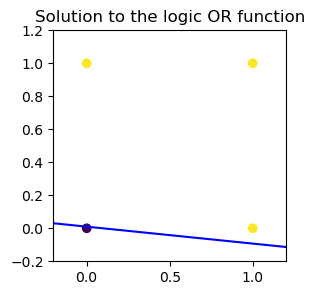

In [8]:
print(f'The perceptron converged in {iterations_OR} iterations')
plot_decision_boundary(perceptron_OR.w, perceptron_OR.b, X, y_OR, 'Solution to the logic OR function')

### Task 2.2 AND function
Repeat the same steps done before for the AND function. Use perceptron_AND and iterations_AND as variables.

In [9]:
#YOUR CODE HERE
perceptron_AND = Perceptron()
iterations_AND = perceptron_AND.perceptron_algorithm(X,y_AND)

Initial weights: ([[0.67881636]
 [0.40579286]] , [[0.2032081]])
*************** Iteration No:  0 ************************
*************** Iteration No:  1 ************************
*************** Iteration No:  2 ************************
*************** Iteration No:  3 ************************
*************** Iteration No:  4 ************************
*************** Iteration No:  5 ************************
*************** Iteration No:  6 ************************
*************** Iteration No:  7 ************************
*************** Iteration No:  8 ************************
*************** Iteration No:  9 ************************
*************** Iteration No:  10 ************************
*************** Iteration No:  11 ************************
*************** Iteration No:  12 ************************
*************** Iteration No:  13 ************************
*************** Iteration No:  14 ************************
*************** Iteration No:  15 ************************
**

The perceptron converged in 32 iterations


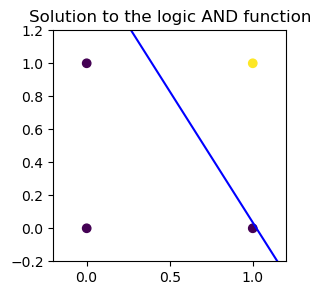

In [10]:
print(f'The perceptron converged in {iterations_AND} iterations')
plot_decision_boundary(perceptron_AND.w, perceptron_AND.b, X, y_AND, 'Solution to the logic AND function')

## Exercise 3: Different initializations of the algorithm
We will now study the effects of initialization in the perceptron algorithm.

### Task 3.1 Multiple runs of the perceptron for the AND function
Instantiate a new Perceptron and store it in a variable called perceptron. Run 3 times the perceptron algorithm to solve the AND logic function. After every run store the obtained parameters in variables w1, b1 (first run); w2, b2 (second run); and w3, b3.

In [15]:
perceptron = Perceptron()

print('****************** First run *******************')
#YOUR CODE HERE
iterations_AND1 = perceptron.perceptron_algorithm(X,y_AND)
print(f'The perceptron converged in {iterations_AND1} iterations')
w1 = perceptron.w
b1 = perceptron.b

print('\n****************** Second run *******************')
#YOUR CODE HERE
iterations_AND2 = perceptron.perceptron_algorithm(X,y_AND)
print(f'The perceptron converged in {iterations_AND2} iterations')
w2 = perceptron.w
b2 = perceptron.b

print('\n****************** Third run *******************')
#YOUR CODE HERE
iterations_AND3 = perceptron.perceptron_algorithm(X,y_AND)
print(f'The perceptron converged in {iterations_AND3} iterations')
w3 = perceptron.w
b3 = perceptron.b

****************** First run *******************
Initial weights: ([[0.03636058]
 [0.39275417]] , [[0.39511117]])
The perceptron converged in 36 iterations

****************** Second run *******************
Initial weights: ([[0.52778731]
 [0.54076227]] , [[0.09330045]])
The perceptron converged in 20 iterations

****************** Third run *******************
Initial weights: ([[0.84203566]
 [0.52375487]] , [[0.06862433]])
The perceptron converged in 35 iterations


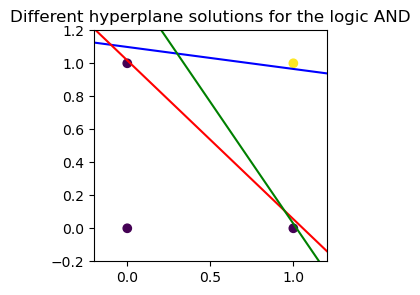

In [16]:
plot_decision_boundaries(w1, w2, w3, b1, b2, b3, X, y_AND, 'Different hyperplane solutions for the logic AND')

### Question 3.1 Analysis
What can you say about the obtained results? What happens with the number of iterations at every run?

Your answer here:

Thr second (red) and third (green) hyperplane seem to have more similarities than the first (blue) hyperplane. All the planes separates the data, but the distance between the planes and a point varies.
The numbers of iteration does not seem to change much with 36 iterations on first run, 20 on second and 35 on third.

## Exercise 4: Solving the XOR with the perceptron
As we saw in the course, the XOR function, as encoded below, cannot be solved using the perceptron:
    
| A    | B    |  A XOR B  |  
|------|------|-----      |
|  0   |  0   | 0         | 
|  0   |  1   | 1         |  
|  1   |  0   | 1         | 
|  1   |  1   | 0         |

### Task 4.1 Data Transformation 
Propose a transormation of the input features X so that the the perceptron can be used to solve it. Explain your solution, implement it and test it. 

Explanation:


In [32]:
y_XOR = [-1, 1, 1, -1]
#YOUR CODE HERE - DATA TRANSFORMATION
X = np.ndarray(shape=(4,1), dtype=int)
X[0] = 0 #A=0 B=0
X[1] = 1 #A=0 B=1
X[2] = 1 #A=1 B=0
X[3] = 0 #A=1 B=1


In [34]:
#Create a perceptron and input the data for the XOR
#YOUR CODE HERE
perceptron_XOR=Perceptron()
iterations_XOR=perceptron_XOR.perceptron_algorithm(X,y_XOR)

Initial weights: ([[0.54671773]] , [[0.27553263]])
*************** Iteration No:  0 ************************
*************** Iteration No:  1 ************************
*************** Iteration No:  2 ************************
*************** Iteration No:  3 ************************
*************** Iteration No:  4 ************************
*************** Iteration No:  5 ************************
*************** Iteration No:  6 ************************
*************** Iteration No:  7 ************************
*************** Iteration No:  8 ************************
*************** Iteration No:  9 ************************
*************** Iteration No:  10 ************************
*************** Iteration No:  11 ************************
*************** Iteration No:  12 ************************
*************** Iteration No:  13 ************************
*************** Iteration No:  14 ************************


In [35]:
# Convergence test
print(f'The perceptron converged in {iterations_XOR} iterations')

The perceptron converged in 14 iterations


### Bonus Task: Plotting
Plot the hyperplane with the solution to the XOR using your proposed transformation.

In [17]:
# In this case, w is len=1 array, unlike the revious cases with len=1. Don't know how to do this.
plot_decision_boundary(perceptron_XOR.w, perceptron_XOR.b, X, y_XOR, 'Solution to the logic XOR function')

IndexError: index 1 is out of bounds for axis 0 with size 1